<Figure size 640x480 with 0 Axes>

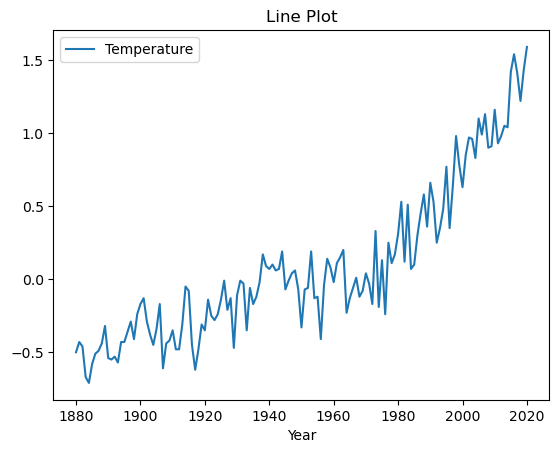

<Figure size 640x480 with 0 Axes>

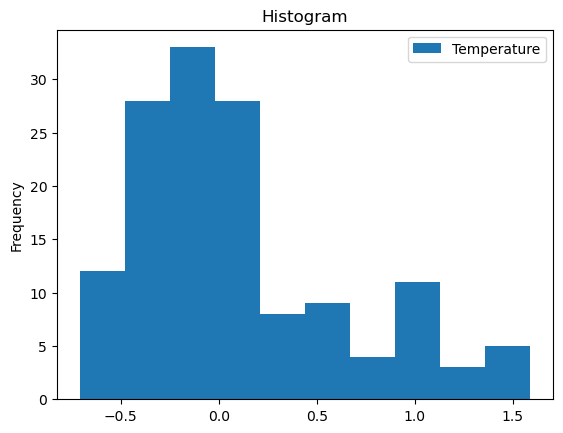

<Figure size 640x480 with 0 Axes>

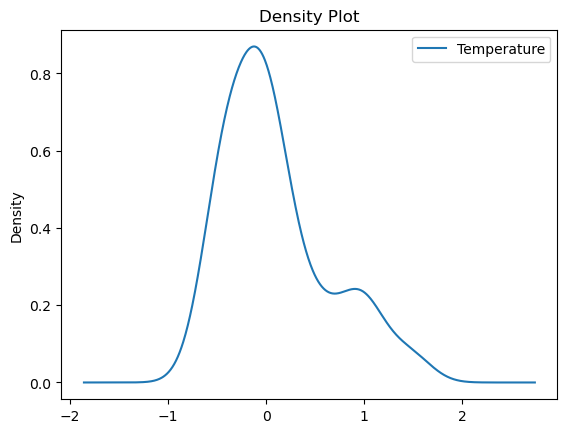

<Figure size 640x480 with 0 Axes>

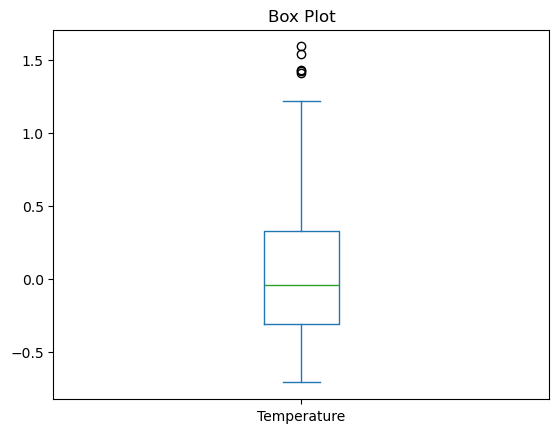

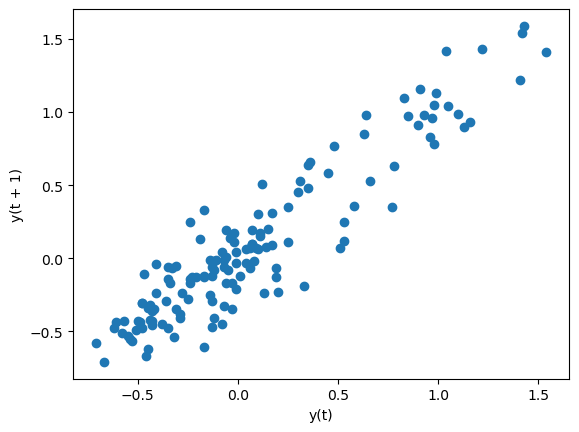

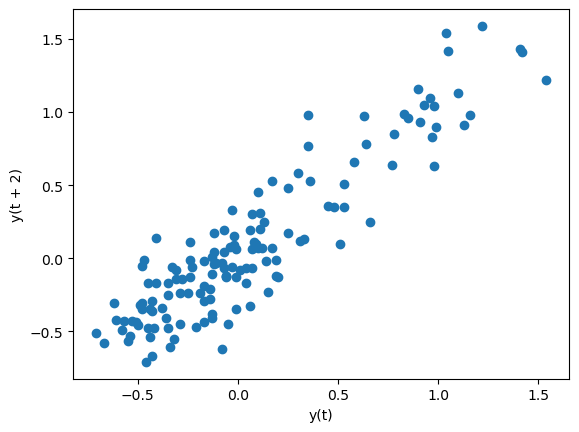

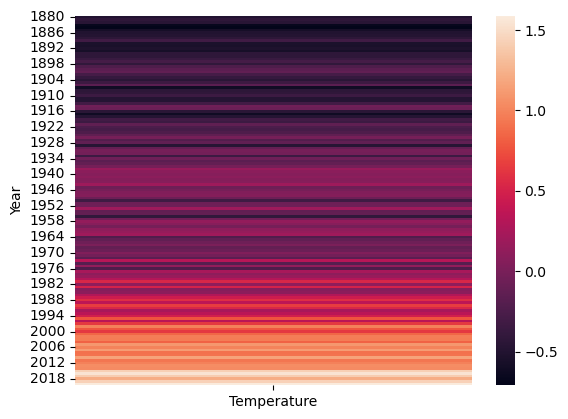

In [1]:
#3.3.1

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def generate_plots(plot_filename_base, series):
    
    # Line plot
    plt.figure()
    series.plot.line(title="Line Plot")
    plt.savefig(f'plots/{plot_filename_base}_line.png')

    # Histogram
    plt.figure()
    series.plot.hist(title="Histogram")
    plt.savefig(f'plots/{plot_filename_base}_hist.png')

    # Density plot
    plt.figure()
    series.plot.density(title="Density Plot")
    plt.savefig(f'plots/{plot_filename_base}_density.png')

    # Box plot
    plt.figure()
    series.plot.box(title="Box Plot")
    plt.savefig(f'plots/{plot_filename_base}_box.png')

    # Lag-1 plot
    plt.figure()
    pd.plotting.lag_plot(series, lag=1)
    plt.savefig(f'plots/{plot_filename_base}_lag1.png')

    # Lag-2 plot
    plt.figure()
    pd.plotting.lag_plot(series, lag=2)
    plt.savefig(f'plots/{plot_filename_base}_lag2.png')

    # HeatMap
    plt.figure()
    sns.heatmap(series)
    plt.savefig(f'plots/{plot_filename_base}_heatmap.png')

    return

#3.2.2
# Load the CSV file into a DataFrame
df = pd.read_excel("global-land-temperature-anomalies-1880-2020.xlsx", 'Data')
series= df.iloc[4:145, 1:3]
series = series.bfill()
series.columns = ['Year', 'Temperature']
#series['Year'] = pd.to_datetime(series['Year'])
series['Year'] = pd.to_numeric(series['Year'])
series.set_index('Year', inplace=True)

generate_plots("T3_1_Temp_Anomaly", series)
    

Original p_value =  0.9935702498622588
Diff 1 p_value =  1.460486937213061e-22


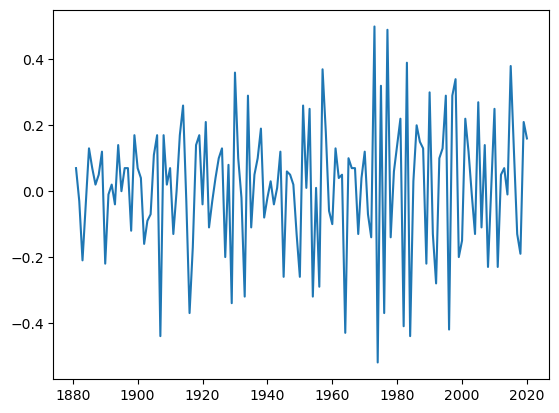

In [12]:
from statsmodels.tsa.stattools import adfuller

# ADF test to check if data is stationary
# p should be < 0.05 is stationary
result_adf = adfuller(series, autolag='AIC')
p_value = result_adf[1]
print("Original p_value = ", p_value)

#Linear trend detected. order-1 differencing applied to remove trend
series_diff = series.diff().dropna()

# Plot data for visual inspection
plt.figure()
plt.plot(series_diff)
plt.savefig('plots/T3_1_TempAnomaly_Diff1.png')
#plt.title("Time series Diff order 1")

# ADF test to check if data is stationary
# p should be < 0.05 is stationary
result_adf = adfuller(series_diff, autolag='AIC')
p_value = result_adf[1]
print("Diff 1 p_value = ", p_value)

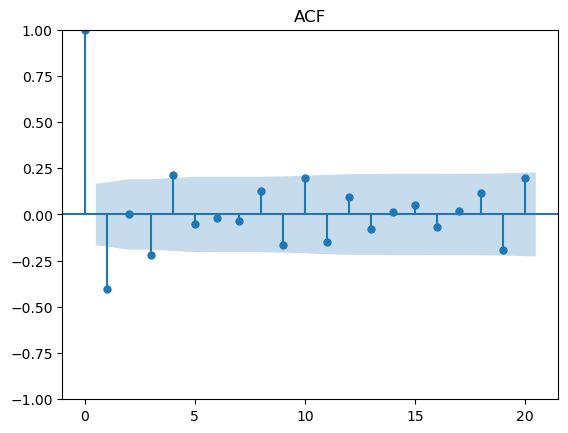

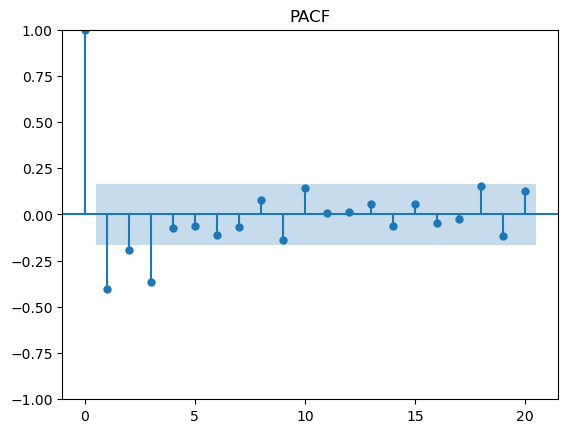

Mean:  Temperature    0.014929
dtype: float64
Variance:  Temperature    0.039834
dtype: float64
Standard deviation:  Temperature    0.199584
dtype: float64


In [3]:
# Feature Extraction
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF graphs to determine p,q values
plot_acf(series_diff, lags=20)
plt.title('ACF')
plt.savefig('plots/T3_1_TempAnomaly_ACF.png')
plt.show()

plot_pacf(series_diff, lags=20)
plt.title('PACF')
plt.savefig('plots/T3_1_TempAnomaly_PACF.png')
plt.show()

# Show data characteristics
print('Mean: ', series_diff.mean())
print('Variance: ', series_diff.var())
print('Standard deviation: ', series_diff.std())

In [4]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima

#model = auto_arima(series_diff, d=1, seasonal=False, information_criterion='aic')
#model.summary()

model = ARIMA(series, order=(2, 1, 4)).fit()
model.summary()


c:\Users\shawn\anaconda3\envs\Embedded_Intelligence\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shawn\anaconda3\envs\Embedded_Intelligence\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shawn\anaconda3\envs\Embedded_Intelligence\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Temperature   No. Observations:                  141
Model:                 ARIMA(2, 1, 4)   Log Likelihood                  51.475
Date:                Thu, 23 May 2024   AIC                            -88.950
Time:                        18:03:59   BIC                            -68.358
Sample:                             0   HQIC                           -80.582
                                - 141                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4070      0.350     -1.163      0.245      -1.093       0.279
ar.L2         -0.3084      0.301     -1.025      0.305      -0.898       0.281
ma.L1         -0.1399      0.354     -0.396      0.692      -0.833       0.553
ma.L2          0.0235      0.229      0.102      0.918      -0.426       0.473
ma.L3         -0.3752      0.165     -2.275      0.023      -0.698      -0.052
ma.L4          0.2028      0.137      1.475      0.140      -0.067       0.472
sigma2         0.0279      0.003      8.030      0.000       0.021       0.035
===================================================================================
Ljung-Box (L1) (Q):                   0.24   Jarque-Bera (JB):                 0.20
Prob(Q):                              0.62   Prob(JB):                         0.90
Heteroskedasticity (H):               2.15   Skew:                            -0.09
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

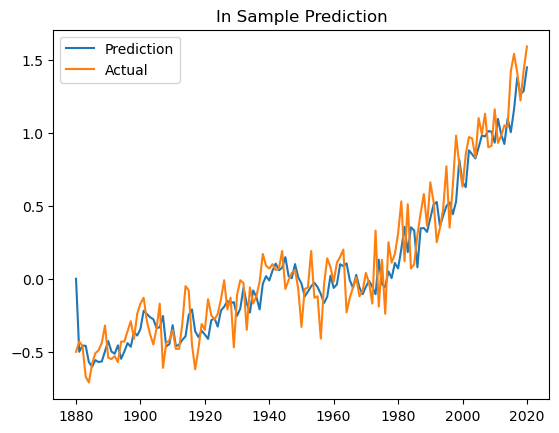

p-value:      lb_stat  lb_pvalue
1  0.258771   0.610966
Ljung-Box test: p value is > 0.05. Thus the data is random



In [5]:
# Prediction
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox

prediction = model.predict(start=0, end = len(series)-1)
plt.figure()
plt.plot(prediction, label='Prediction')
plt.plot(series, label="Actual")
plt.legend()
plt.title("In Sample Prediction")
plt.savefig('plots/T3_1_TempAnomaly_InSample_Prediction.png')
plt.show()

residuals = model.resid
# perform Ljung-Box test on residuals with lag=1 to check if random
result_lb = acorr_ljungbox(residuals, lags=[1], return_df=True)
print('p-value: ',result_lb)
print("Ljung-Box test: p value is > 0.05. Thus the data is random\n")



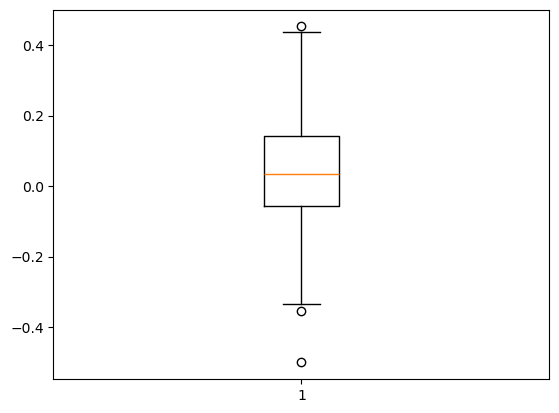

Outliers 
    Year         0
0  1880 -0.500000
1  1907 -0.355243
2  1998  0.452661


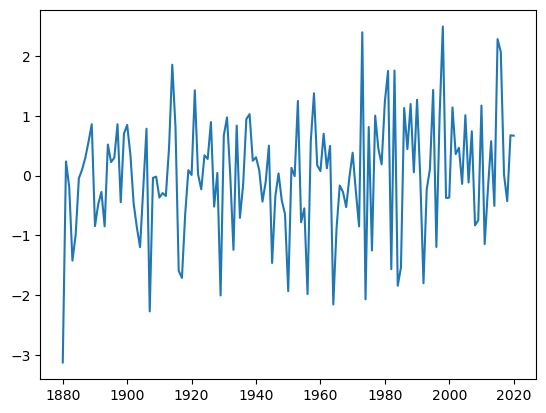

Zscore:  0.7630227693413273
Anomalies: 
 Year
1880   -3.129454
1907   -2.274380
1929   -2.007329
1964   -2.157894
1973    2.400043
1974   -2.071308
1998    2.497875
2015    2.286010
2016    2.072891
dtype: float64


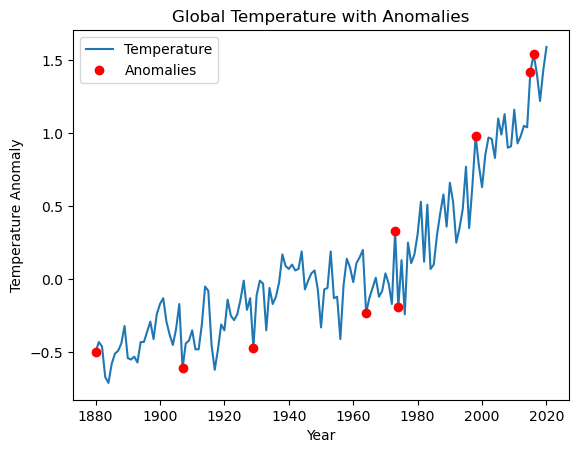

In [15]:
from pandas import Series

# Anomaly Detection
def box_plot_outlier(data):

    # Calculate quartiles and IQR
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)

    iqr = q3 - q1

    # Find outliers using IQR method
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    return outliers

def z_score(data):
    # Calculate Z-score for each data point
    return (data - np.mean(data)) / np.std(data)

def find_anomalies(series, name="plot", filename="Anomaly"):

    #Box plot
    plt.figure()
    plt.boxplot(series)
    plt.title = name
    plt.savefig(f'plots/{filename}_BoxPlot.png')
    plt.show()

    # Print Outliers
    outliers = box_plot_outlier(series)
    print("Outliers \n",series[series.isin(outliers)].reset_index())

    # Plot zscores
    zscore = z_score(series)
    plt.figure()
    plt.plot(zscore)
    plt.title = name
    plt.savefig(f'plots/{filename}_ZScore.png')
    plt.show()

    # Anomalies
    anomalies = zscore[zscore.abs() > 2]    # 98% Anomaly Threshold
    print("Anomalies: \n",anomalies)
    return anomalies

anomalies = find_anomalies(residuals, "Global Temp Residual Series", "T3_1GlobalTempResid_Series")

# Plot series with anomalies marked
series.plot.line(title="Global Temperature with Anomalies")
plt.plot(anomalies.index, series.loc[anomalies.index], 'ro', label = "Anomalies")
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly')
plt.legend()
plt.savefig(f"plots/T3_1_GlobTemp_with_Anomalies.png")
plt.show()


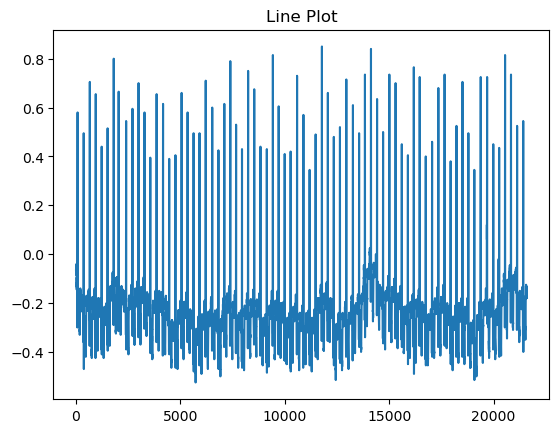

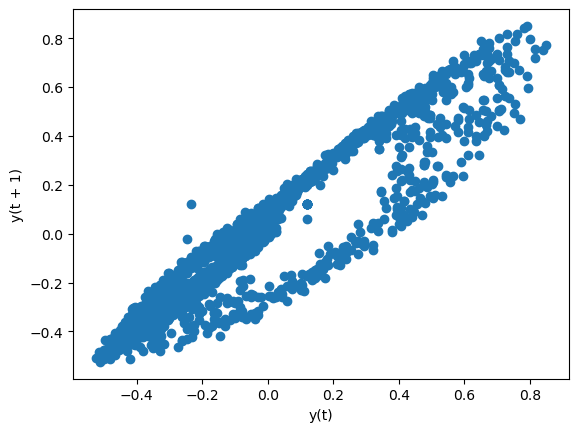

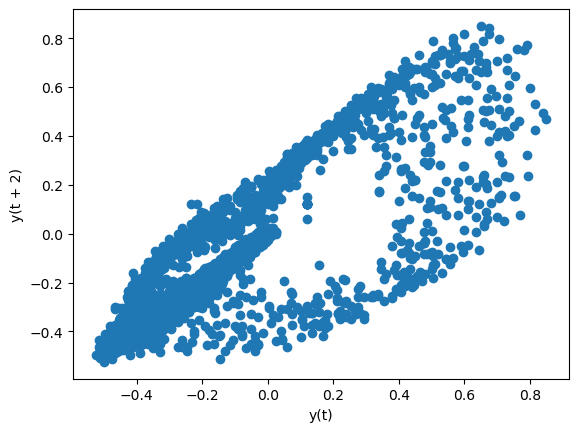

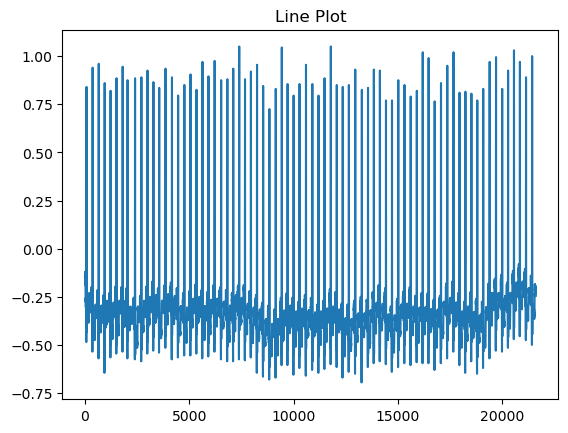

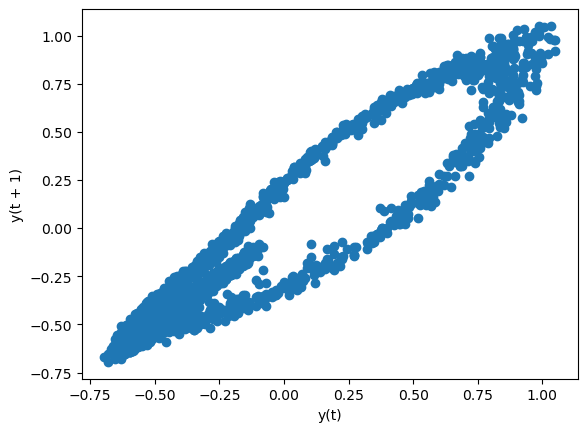

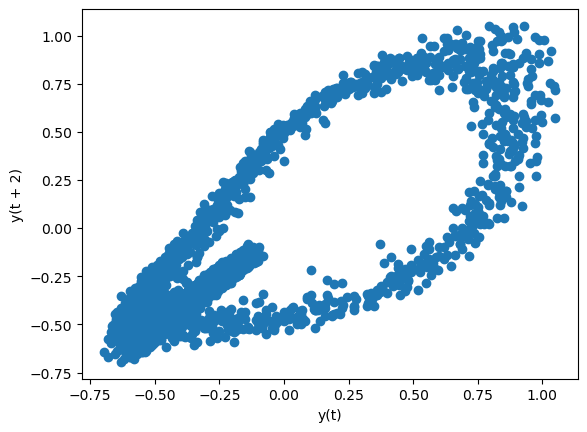

In [7]:
#3.3.2

def generate_plots(series, plot_filename_base):
    
    # Line plot
    plt.figure()
    series.plot.line(title="Line Plot")
    plt.savefig(f'plots/{plot_filename_base}_line.png')
    plt.show()

    # Lag-1 plot
    plt.figure()
    pd.plotting.lag_plot(series, lag=1)
    plt.savefig(f'plots/{plot_filename_base}_lag1.png')

    # Lag-2 plot
    plt.figure()
    pd.plotting.lag_plot(series, lag=2)
    plt.savefig(f'plots/{plot_filename_base}_lag2.png')

    return

# Load csv
df = pd.read_csv('100.csv', skiprows=[1], index_col=["'Elapsed time'"])
series_mlii = pd.Series(df["'MLII'"].values, dtype=float)
series_v5 = pd.Series(df["'V5'"].values, dtype=float)

# Exploratory Data Analysis
generate_plots(series_v5, "T3_2_ECG_V5")
generate_plots(series_mlii, "T3_2_ECG_MLII")



In [8]:
from keras.layers import Dense
from keras.layers import LSTM
from keras.models import Sequential

def split_data(series, input_window, output_window, training_percent):

    input_seq = []
    output_seq = []

    # Separate series into input and output series based onrequired steps
    for i in range(len(series) - input_window - output_window + 1):
        input_seq.append(series[i:i + input_window])
        output_seq.append(series[i + input_window:i + input_window + output_window])

    input_seq = np.array(input_seq)
    output_seq = np.array(output_seq)

    # Split data into 80% for training, 20% for predication
    split_index = round(len(input_seq)*training_percent)
    # training data
    input_train = input_seq[:split_index]
    output_train = output_seq[:split_index]
    # testing data
    input_predict = input_seq[split_index:]
    output_predict = output_seq[split_index:]

    return [input_train, output_train], [input_predict, output_predict]

#define an LSTM model to be trained
def create_LSTM(input_train, output_train, window_size_in, window_size_out, epochs = 1):

    num_neurons = 64

    # Create LSTM model
    model = Sequential()
    model.add(LSTM(num_neurons,activation="relu",input_shape=(window_size_in,window_size_out)))    # Input layer
    model.add(Dense(32))
    model.add(Dense(16))
    model.add(Dense(window_size_out))  # Output layer, no activation for regression

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(input_train, output_train, epochs=epochs, batch_size=32)

#    model.summary()
    return model


Epoch 1/50


c:\Users\shawn\anaconda3\envs\Embedded_Intelligence\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0144
Epoch 2/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.9653e-04
Epoch 3/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.6966e-04
Epoch 4/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.7443e-04
Epoch 5/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.8435e-04
Epoch 6/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.6955e-04
Epoch 7/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.5096e-04
Epoch 8/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.3135e-04
Epoch 9/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.5431e-04
Epoch 10/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.3178e-04
Epoch 11/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.3918e-04
Epoch 12/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.2904e-04
Epoch 13/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.2460e-04
Epoch 14/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.1386e-04
Epoch 15/50
540/

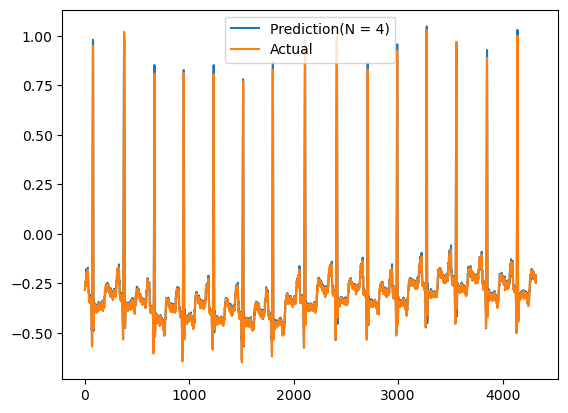

LSTM - Input Vector (N = 4)
R2 =  0.9939754378296604
MAE =  0.01024438972192234
MSE =  0.00019519780250417892
MAPE =  0.06194302249512407
Anomalies: 
 [  67   73   79  376  656  933 1501 1507 1517 1789 1801 2102 2413 2416
 2698 2992 3267 3274 3550 3558 3840 3843]
67     -0.550
73      0.040
79      0.740
376     1.020
656    -0.575
933    -0.610
1501   -0.585
1507   -0.340
1517    0.490
1789   -0.570
1801    0.685
2102   -0.065
2413    0.995
2416    0.135
2698   -0.510
2992    0.760
3267   -0.235
3274    0.980
3550   -0.295
3558    0.855
3840   -0.465
3843   -0.375
dtype: float64


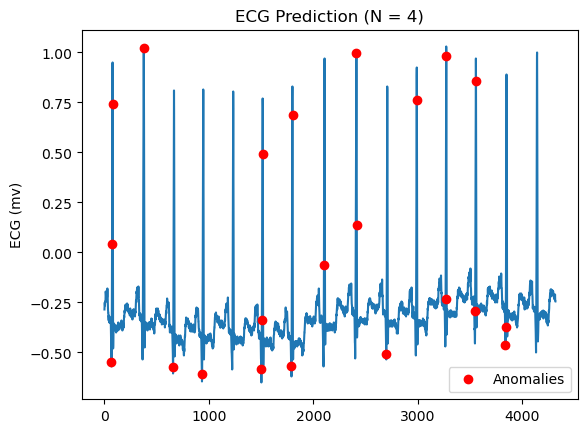

Epoch 1/50


c:\Users\shawn\anaconda3\envs\Embedded_Intelligence\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


540/540 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0130
Epoch 2/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 6.2675e-04
Epoch 3/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 4.1600e-04
Epoch 4/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 3.4843e-04
Epoch 5/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 3.1612e-04
Epoch 6/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 3.1879e-04
Epoch 7/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 2.7909e-04
Epoch 8/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 2.5869e-04
Epoch 9/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 2.4689e-04
Epoch 10/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2.5982e-04
Epoch 11/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2.0715e-04
Epoch 12/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 2.1525e-04
Epoch 13/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 2.0747e-04
Epoch 14/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2.0007e-04
Epoch 15/50
540/

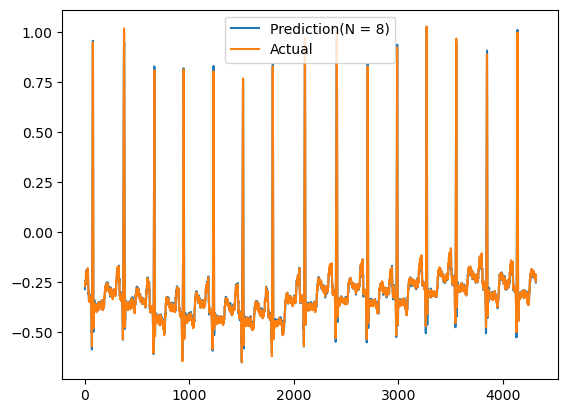

LSTM - Input Vector (N = 8)
R2 =  0.9951860237284382
MAE =  0.009026590071475342
MSE =  0.00015047817883756507
MAPE =  0.03260137807664042
Anomalies: 
 [  66  375  378  932 1500 1506 1788 2100 2104 2409 2412 2416 2993 3264
 3274 3278 3503 3548 3549 3851 4133 4145]
66     -0.550
375     1.020
378     0.665
932    -0.610
1500   -0.585
1506   -0.340
1788   -0.570
2100   -0.225
2104    0.640
2409    0.690
2412    0.995
2416   -0.210
2993    0.035
3264   -0.450
3274    0.755
3278   -0.410
3503   -0.095
3548   -0.410
3549   -0.295
3851    0.750
4133   -0.445
4145    0.195
dtype: float64


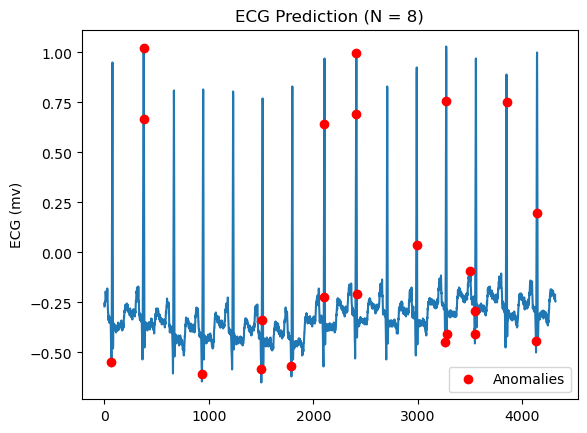

Epoch 1/50


c:\Users\shawn\anaconda3\envs\Embedded_Intelligence\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


540/540 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0101
Epoch 2/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 5.6681e-04
Epoch 3/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 4.4231e-04
Epoch 4/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 3.5376e-04
Epoch 5/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 3.4870e-04
Epoch 6/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 2.9044e-04
Epoch 7/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 2.9667e-04
Epoch 8/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 2.6244e-04
Epoch 9/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 2.9067e-04
Epoch 10/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 2.6911e-04
Epoch 11/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 2.5727e-04
Epoch 12/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 2.4211e-04
Epoch 13/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 2.1773e-04
Epoch 14/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 2.2791e-04
Epoch 15/50
540/

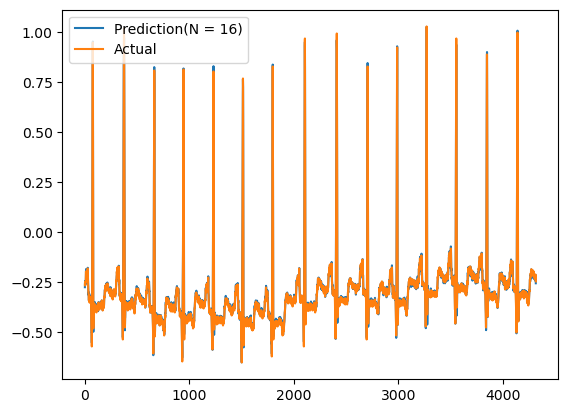

LSTM - Input Vector (N = 16)
R2 =  0.9949498086914205
MAE =  0.00935850733505829
MSE =  0.00015739209254960536
MAPE =  0.033667221063479684
Anomalies: 
 [  65  373  374 1503 1505 1515 1784 1799 2095 2395 2408 2411 2981 2992
 3265 3277 3548 3549 3838 3841 4132 4144]
65     -0.550
373     0.970
374     1.020
1503   -0.480
1505   -0.340
1515    0.490
1784   -0.525
1799    0.685
2095   -0.570
2395   -0.415
2408    0.690
2411    0.995
2981   -0.450
2992    0.035
3265   -0.235
3277   -0.410
3548   -0.295
3549   -0.130
3838   -0.465
3841   -0.375
4132   -0.445
4144    0.195
dtype: float64


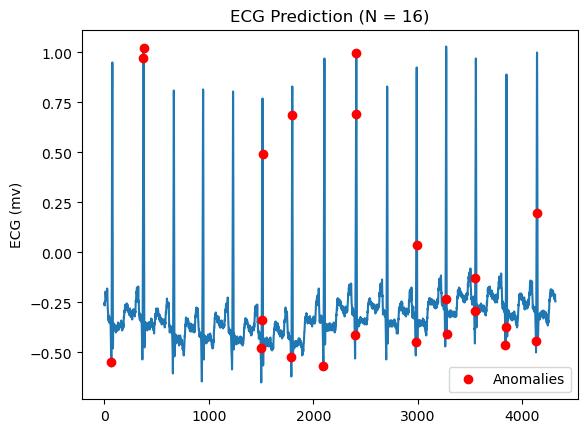

Epoch 1/50


c:\Users\shawn\anaconda3\envs\Embedded_Intelligence\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


540/540 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0085
Epoch 2/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 6.4270e-04
Epoch 3/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 4.3600e-04
Epoch 4/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 3.4031e-04
Epoch 5/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 3.0316e-04
Epoch 6/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2.9807e-04
Epoch 7/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.0964e-04
Epoch 8/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.8780e-04
Epoch 9/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2.9410e-04
Epoch 10/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 2.7359e-04
Epoch 11/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2.5752e-04
Epoch 12/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 2.5719e-04
Epoch 13/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2.4417e-04
Epoch 14/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2.3102e-04
Epoch 15/50
540/

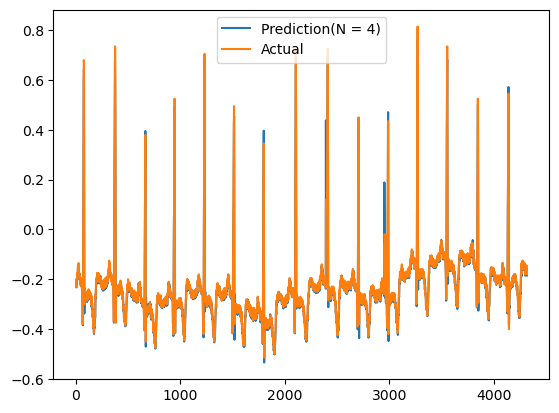

LSTM - Input Vector (N = 4)
R2 =  0.9831950066824527
MAE =  0.010707852259195494
MSE =  0.00030066034838844826
MAPE =  0.0559638631475596
Anomalies: 
 [  67   75  365  372  374  375  376  665  671 1222 2392 2393 2395 2404
 2409 2410 2952 2953 2963 2986 3547 3552]
67     -0.260
75      0.680
365    -0.115
372     0.620
374     0.735
375     0.705
376     0.610
665     0.240
671    -0.340
1222   -0.330
2392    0.120
2393    0.120
2395    0.120
2404    0.150
2409    0.600
2410    0.695
2952   -0.020
2953   -0.020
2963   -0.260
2986    0.185
3547   -0.085
3552    0.520
dtype: float64


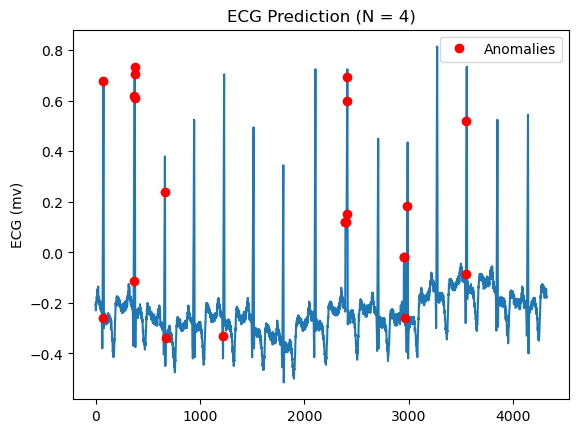

Epoch 1/50


c:\Users\shawn\anaconda3\envs\Embedded_Intelligence\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


540/540 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0054
Epoch 2/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 6.0212e-04
Epoch 3/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 3.8333e-04
Epoch 4/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 3.0155e-04
Epoch 5/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 2.7717e-04
Epoch 6/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 2.6900e-04
Epoch 7/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 2.6564e-04
Epoch 8/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 2.5263e-04
Epoch 9/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 2.4140e-04
Epoch 10/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 2.3028e-04
Epoch 11/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 2.2349e-04
Epoch 12/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 1.9449e-04
Epoch 13/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 1.8321e-04
Epoch 14/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1.8969e-04
Epoch 15/50
540/

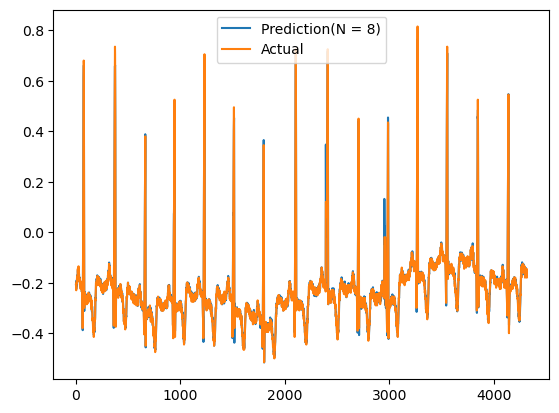

LSTM - Input Vector (N = 8)
R2 =  0.9880589731373898
MAE =  0.008819240168592842
MSE =  0.0002157366153956471
MAPE =  0.071354770689068
Anomalies: 
 [ 371  373  664  943 1221 1512 1513 1516 1798 2391 2392 2403 2406 2408
 2409 2951 2952 2962 3267 3270 3847 4139]
371     0.620
373     0.735
664     0.240
943     0.525
1221   -0.330
1512    0.495
1513    0.395
1516   -0.380
1798    0.170
2391    0.120
2392    0.120
2403    0.150
2406    0.420
2408    0.600
2409    0.695
2951   -0.020
2952   -0.020
2962   -0.260
3267    0.460
3270    0.815
3847    0.525
4139    0.545
dtype: float64


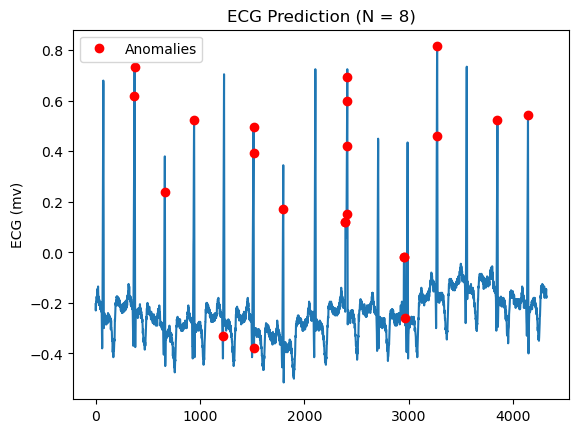

Epoch 1/50


c:\Users\shawn\anaconda3\envs\Embedded_Intelligence\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


540/540 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0070
Epoch 2/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 5.3083e-04
Epoch 3/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 3.8875e-04
Epoch 4/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 3.5206e-04
Epoch 5/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 3.0931e-04
Epoch 6/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 2.5302e-04
Epoch 7/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 2.5194e-04
Epoch 8/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 2.4972e-04
Epoch 9/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 2.0707e-04
Epoch 10/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 2.0893e-04
Epoch 11/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 1.8381e-04
Epoch 12/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 2.0539e-04
Epoch 13/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 1.9308e-04
Epoch 14/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 1.7507e-04
Epoch 15/50
5

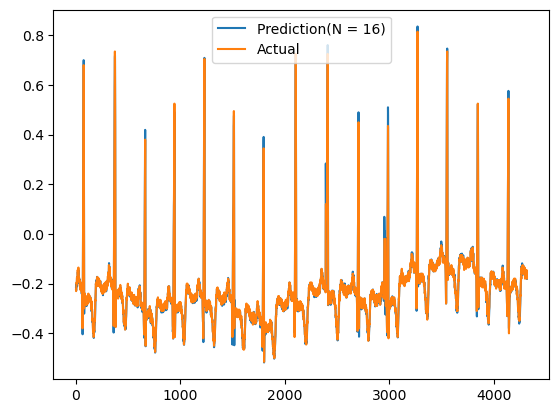

LSTM - Input Vector (N = 16)
R2 =  0.9889700464907758
MAE =  0.008896860283628393
MSE =  0.00021672440426155894
MAPE =  0.05265605908445079
Anomalies: 
 [  72  663  936 1230 1512 1515 2390 2391 2402 2403 2405 2410 2703 2706
 2950 2951 2961 2962 2969 2986 3270 3554]
72      0.595
663     0.240
936     0.030
1230    0.505
1512    0.395
1515   -0.380
2390    0.120
2391    0.120
2402    0.150
2403    0.235
2405    0.420
2410    0.565
2703    0.370
2706    0.220
2950   -0.020
2951   -0.020
2961   -0.260
2962   -0.240
2969   -0.255
2986    0.435
3270    0.720
3554    0.555
dtype: float64


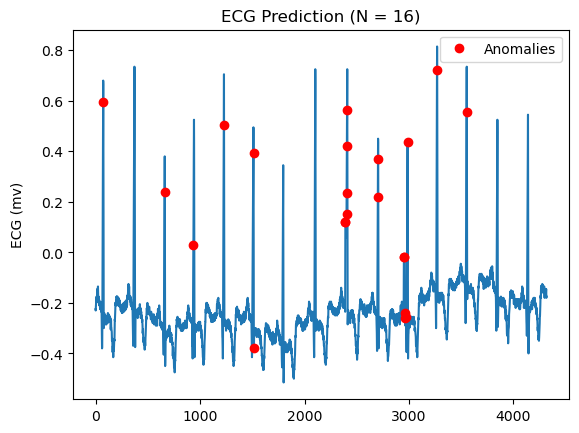

In [9]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

def find_prediction_anomalies(series_predict, series_actual):

    series_err = np.abs(series_actual - series_predict)
    threshold = np.percentile(series_err, 99.5)       # 0.5% error raye
    anomalies = np.where(series_err>threshold)[0]

    print("Anomalies: \n",anomalies)
    return anomalies

def LSTM_prediction(series, input_window_list, output_window, epochs, savefile):
    # Generate data for each input window
    for n in input_window_list:
        # Split data as required
        train_series, test_series = split_data(series, n, output_window, 0.8)

        # Create LSTM
        LSTM = create_LSTM(train_series[0], train_series[1], n, output_window, epochs)

        # Predict out of sample values
        LSTM_Output_Predict = LSTM.predict(test_series[0], verbose=0)

        # plot series
        plt.figure()
        plt.plot(LSTM_Output_Predict, label="Prediction(N = "+ str(n) +")")
        plt.plot(test_series[1], label="Actual")
        plt.title = "LSTM - Prediction vs Expected (N = "+ str(n) +")"
        plt.savefig(f'plots/LSTM_prediction_{savefile}_(N = '+ str(n) +').png')
        plt.legend()
        plt.show()

        # Calculate Metrics
        print("LSTM - Input Vector (N = " + str(n) +")")
        print('R2 = ', r2_score(LSTM_Output_Predict, test_series[1]))
        print('MAE = ', mean_absolute_error(LSTM_Output_Predict, test_series[1]))
        print('MSE = ', mean_squared_error(LSTM_Output_Predict, test_series[1]))
        print('MAPE = ', mean_absolute_percentage_error(LSTM_Output_Predict, test_series[1]))

        # Plot Anomalies
        anomalies = Series(find_prediction_anomalies(LSTM_Output_Predict, test_series[1]).reshape(-1))
        test_series_plot = Series(test_series[1][:,0].reshape(-1))

        print(test_series_plot.iloc[anomalies])

        # Plot series with anomalies marked
        test_series_plot.plot.line(title = "ECG Prediction (N = " + str(n) +")")
        plt.plot(anomalies, test_series_plot.iloc[anomalies], 'ro', label = "Anomalies")
        plt.ylabel('ECG (mv)')
        plt.legend()
        plt.savefig(f"plots/{savefile}_{n}.png")
        plt.show()
 

# Create LSTM Models
input_window = [4,8,16]
epochs = 50
output_window = 1 # Univariate

# Run model prediction
LSTM_prediction(series_mlii, input_window, output_window, epochs, "T3_2_ECG_MLII_pred")
LSTM_prediction(series_v5, input_window, output_window, epochs, "T3_2_ECG_V5_pred")



Epoch 1/50


c:\Users\shawn\anaconda3\envs\Embedded_Intelligence\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1080/1080 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0083
Epoch 2/50
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 4.2222e-04
Epoch 3/50
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 3.1971e-04
Epoch 4/50
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 2.9109e-04
Epoch 5/50
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 2.9132e-04
Epoch 6/50
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 2.7143e-04
Epoch 7/50
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 2.4507e-04
Epoch 8/50
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 2.4126e-04
Epoch 9/50
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.3944e-04
Epoch 10/50
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 2.3322e-04
Epoch 11/50
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 2.3009e-04
Epoch 12/50
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 2.2699e-04
Epoch 13/50
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 2.2239e-04
Epoch 14/50
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss:

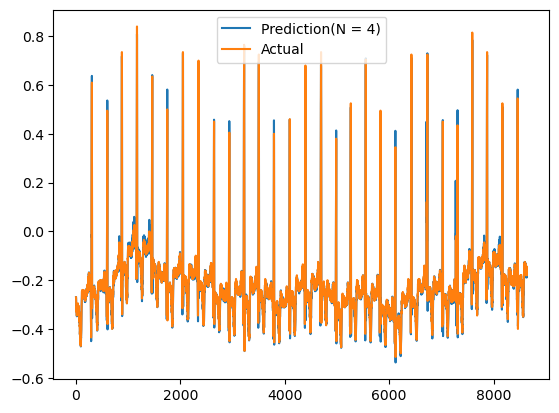

LSTM - Input Vector (N = 4)
R2 =  0.9868321813101332
MAE =  0.010242784753810932
MSE =  0.0002439303725555263
MAPE =  0.08353691546943648
Anomalies: 
 [ 293  592  600 1160 1172 1173 1452 1748 2040 2636 2929 3211 3219 3784
 4387 4684 4692 4985 5542 5552 5555 5834 5837 6118 6712 6713 6715 6723
 6724 6725 6729 6730 7018 7272 7273 7283 7284 7309 7583 7595 7867 7878
 8160 8452]
293    -0.260
592    -0.185
600     0.415
1160   -0.065
1172   -0.080
1173   -0.130
1452   -0.135
1748    0.500
2040   -0.200
2636   -0.245
2929   -0.240
3211   -0.260
3219    0.730
3784   -0.305
4387   -0.260
4684   -0.265
4692    0.620
4985    0.240
5542   -0.330
5552    0.505
5555   -0.290
5834    0.395
5837   -0.380
6118    0.345
6712    0.120
6713    0.120
6715    0.120
6723    0.060
6724    0.150
6725    0.235
6729    0.600
6730    0.695
7018   -0.315
7272   -0.020
7273   -0.020
7283   -0.260
7284   -0.240
7309    0.430
7583   -0.205
7595   -0.175
7867   -0.085
7878   -0.055
8160   -0.185
8452   -0.215
dtype: f

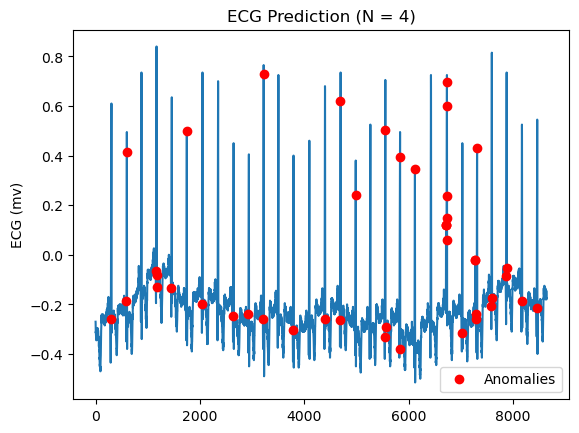

Epoch 1/50


c:\Users\shawn\anaconda3\envs\Embedded_Intelligence\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1080/1080 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0075
Epoch 2/50
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 4.7873e-04
Epoch 3/50
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 3.3954e-04
Epoch 4/50
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 3.1015e-04
Epoch 5/50
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 2.7593e-04
Epoch 6/50
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 2.4973e-04
Epoch 7/50
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 2.3935e-04
Epoch 8/50
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 2.3464e-04
Epoch 9/50
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 2.2063e-04
Epoch 10/50
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 2.0095e-04
Epoch 11/50
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 1.9880e-04
Epoch 12/50
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 2.0542e-04
Epoch 13/50
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 1.8546e-04
Epoch 14/50
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss:

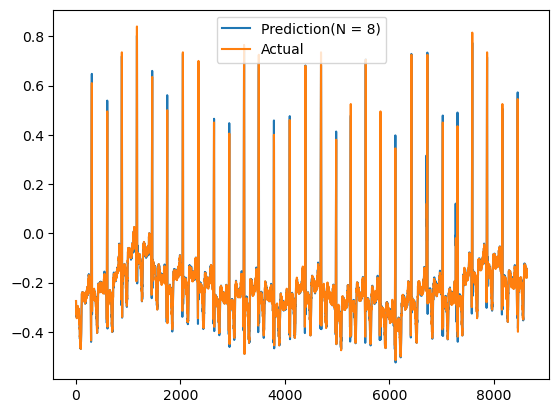

LSTM - Input Vector (N = 8)
R2 =  0.9900498843648229
MAE =  0.008945421925214365
MSE =  0.0001850564713830005
MAPE =  0.058343707854541065
Anomalies: 
 [ 301  591  599 1159 1160 1172 1738 1747 2337 2644 3218 3221 3501 3783
 3791 4984 5541 5551 5832 5833 6118 6711 6712 6713 6714 6723 6726 6729
 6731 7017 7027 7271 7272 7282 7283 7299 7300 7305 7307 7582 7595 8158
 8159 8451]
301     0.510
591    -0.185
599     0.415
1159   -0.065
1160    0.060
1172   -0.130
1738   -0.280
1747    0.500
2337   -0.270
2644    0.410
3218    0.730
3221    0.460
3501    0.725
3783   -0.305
3791    0.400
4984    0.240
5541   -0.330
5551    0.505
5832    0.495
5833    0.395
6118    0.170
6711    0.120
6712    0.120
6713    0.120
6714    0.120
6723    0.150
6726    0.420
6729    0.695
6731    0.565
7017   -0.315
7027    0.220
7271   -0.020
7272   -0.020
7282   -0.260
7283   -0.240
7299   -0.355
7300   -0.260
7305    0.185
7307    0.435
7582   -0.205
7595   -0.195
8158   -0.275
8159   -0.185
8451   -0.215
dtype: 

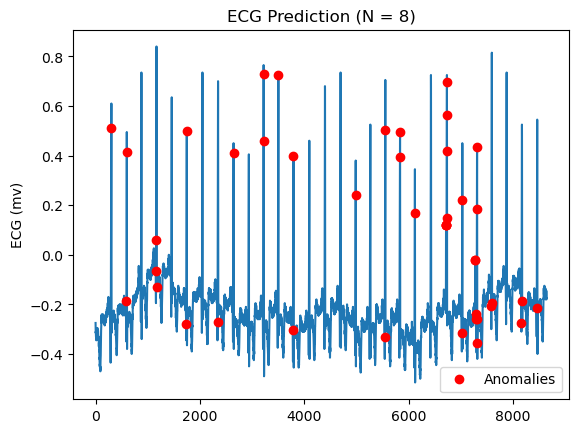

Epoch 1/50


c:\Users\shawn\anaconda3\envs\Embedded_Intelligence\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1080/1080 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - loss: 0.0062
Epoch 2/50
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - loss: 4.5594e-04
Epoch 3/50
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 3.3146e-04
Epoch 4/50
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - loss: 2.9680e-04
Epoch 5/50
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 2.5901e-04
Epoch 6/50
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 2.4313e-04
Epoch 7/50
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 2.6439e-04
Epoch 8/50
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 2.2080e-04
Epoch 9/50
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 2.2299e-04
Epoch 10/50
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 2.1327e-04
Epoch 11/50
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 2.0031e-04
Epoch 12/50
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 1.9613e-04
Epoch 13/50
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 1.9048e-04
Epoch 14/50
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/

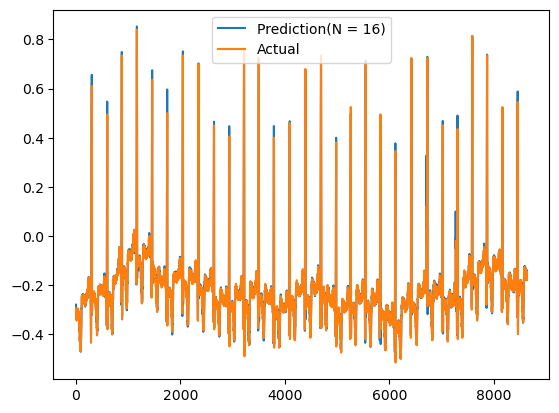

LSTM - Input Vector (N = 16)
R2 =  0.9908366217521157
MAE =  0.008528402949883605
MSE =  0.00017145878508726523
MAPE =  0.05849750059876857
Anomalies: 
 [ 597  598  880 1158 1159 1160 1167 1175 1450 1451 1737 1746 1750 2346
 2643 3217 3496 4395 4684 4983 5545 5550 5831 5832 5835 6107 6117 6710
 6711 6713 6721 6722 6725 6726 7023 7026 7270 7271 7281 7282 7284 7306
 7590 8165]
597     0.495
598     0.415
880     0.030
1158   -0.065
1159    0.060
1160    0.205
1167    0.750
1175   -0.080
1450   -0.135
1451   -0.015
1737   -0.280
1746    0.500
1750   -0.365
2346    0.635
2643    0.410
3217    0.730
3496    0.365
4395    0.445
4684   -0.010
4983    0.240
5545    0.270
5550    0.505
5831    0.495
5832    0.395
5835   -0.380
6107   -0.395
6117    0.170
6710    0.120
6711    0.120
6713    0.120
6721    0.060
6722    0.150
6725    0.420
6726    0.510
7023    0.370
7026    0.220
7270   -0.020
7271   -0.020
7281   -0.260
7282   -0.240
7284   -0.265
7306    0.435
7590    0.720
8165    0.455
dtype:

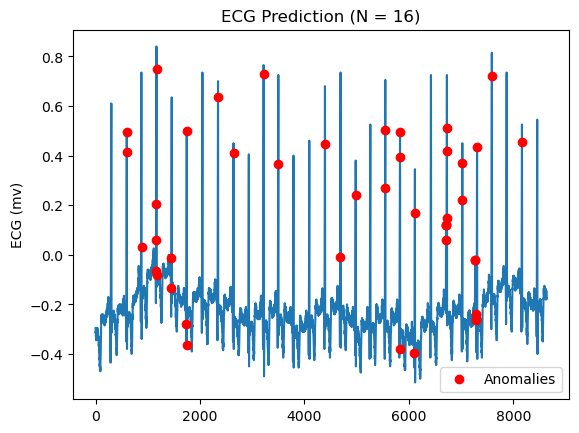

In [10]:
# Use data as Bi-variate

# Convert univariate
# x = {x0,x1,x2}
# y = {y0,y1,y2}
# To Bivariate
# z = {{x0,y0},{x1,y1},{x2,y2}

# Combine both univariate series into bivariate
bivariate_series = pd.concat([series_mlii, series_v5])

input_window = [4,8,16]
epochs = 50
output_window = 1

# Run model predictions
LSTM_prediction(bivariate_series, input_window, output_window, epochs, "T3_2_ECG_Bivariate_pred")
